
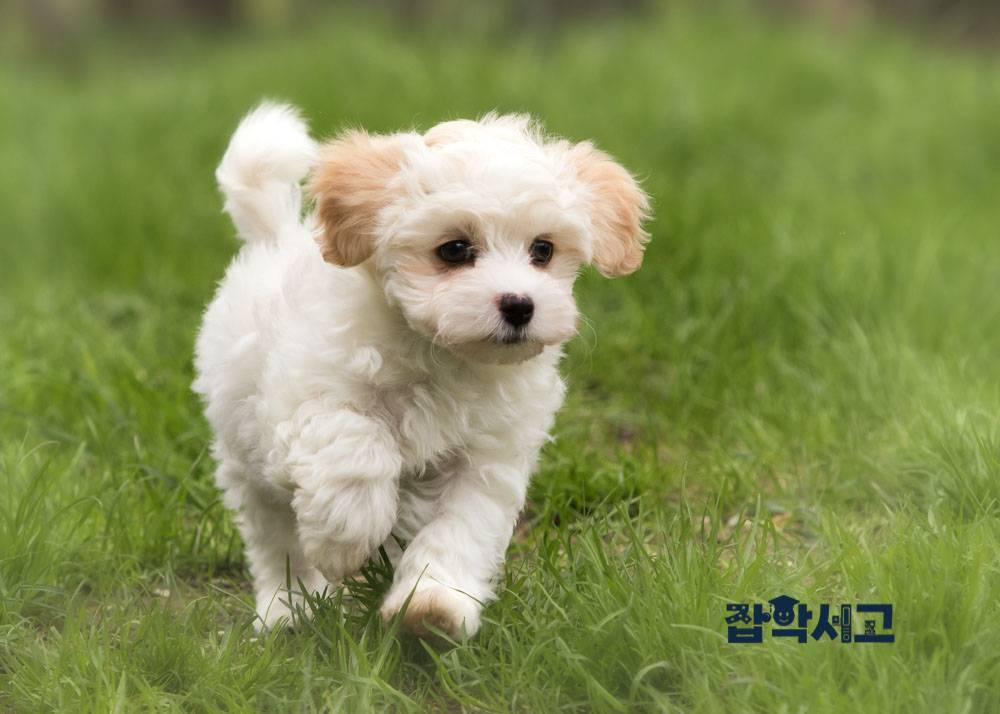

In [ ]:
import base64
from io import BytesIO

from IPython.display import HTML, display
from PIL import Image
from langchain_core.messages import HumanMessage


def convert_to_base64(pil_image):
    """
    PIL 이미지를 Base64로 인코딩된 문자열로 변환합니다.

    :param pil_image: PIL 이미지
    :return: 크기 조정된 Base64 문자열
    """

    buffered = BytesIO()
    pil_image.save(buffered, format="JPEG")  # 필요한 경우 형식을 변경할 수 있습니다.
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return img_str


def plt_img_base64(img_base64):
    """
    Base64로 인코딩된 문자열을 이미지로 표시합니다.

    :param img_base64:  Base64 문자열
    """
    # Base64 문자열을 소스로 사용하여 HTML img 태그 생성
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
    # HTML을 렌더링하여 이미지 표시
    display(HTML(image_html))


def prompt_func(data):  # 프롬프트 함수를 정의합니다.
    text = data["text"]  # 데이터에서 텍스트를 가져옵니다.
    image = data["image"]  # 데이터에서 이미지를 가져옵니다.

    image_part = {  # 이미지 부분을 정의합니다.
        "type": "image_url",  # 이미지 URL 타입을 지정합니다.
        "image_url": f"data:image/jpeg;base64,{image}",  # 이미지 URL을 생성합니다.
    }

    content_parts = []  # 콘텐츠 부분을 저장할 리스트를 초기화합니다.

    text_part = {"type": "text", "text": text}  # 텍스트 부분을 정의합니다.

    content_parts.append(image_part)  # 이미지 부분을 콘텐츠 부분에 추가합니다.
    content_parts.append(text_part)  # 텍스트 부분을 콘텐츠 부분에 추가합니다.

    return [HumanMessage(content=content_parts)]  # HumanMessage 객체를 반환합니다.


file_path =  "./data/dogs.jpg"
pil_image = Image.open(file_path)

image_b64 = convert_to_base64(pil_image)

plt_img_base64(image_b64)

In [4]:
from langchain_core.output_parsers import StrOutputParser
from langchain_ollama import ChatOllama
from langchain_core.messages import HumanMessage

# ChatOllama 멀티모달 언어 모델을 불러옵니다.
llm = ChatOllama(model="llava:7b", temperature=0)

# 프롬프트 함수, 언어 모델, 출력 파서를 연결하여 체인을 생성합니다.
chain = prompt_func | llm | StrOutputParser()

query_chain = chain.invoke(  # 체인을 호출하여 쿼리를 실행합니다.
    # 텍스트와 이미지를 전달합니다.
    {"text": "Describe a picture in bullet points", "image": image_b64}
)

print(query_chain)  # 쿼리 결과를 출력합니다.

 - The image features a small, fluffy puppy.
- The puppy is walking on grass and appears to be looking down at the ground.
- It has a light brown or cream coat with darker brown ears.
- The puppy's tail is curled up in excitement or anticipation.
- There are no visible texts or brands in the image.
- The background is out of focus, but it seems to be an outdoor setting with grass and possibly some plants or flowers.
- The style of the photo is a casual, candid shot, capturing a moment of the puppy's life. 
